Di sini testnya template banget, biasanya digunakan untuk orang yang akan apply digital marketing, khususnnya managing ads, biaasanya untuk orang yang akan menjalankan iklan namun dengan data hasil report campaign orang sebelumnya, tapi lebih tepatnya ini disebut digital anlyst ya, karena mainan visualisasi data, dan di test tersebut, mengharuskan candidate menggunakan google studio, karena saya tidak familiar, jadinya saya visualisasi dengan pandas.

Sekian

In [ ]:
import pandas as pd
from io import StringIO
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1g4dXs91HOijsnAMEyKfQNISnA7K0JO0klM0mE9_CpwQ/edit?usp=sharing'
csv_url = google_sheet_url.replace('/edit?usp=sharing', '/gviz/tq?tqx=out:csv')
data = pd.read_csv(csv_url, skiprows=1)

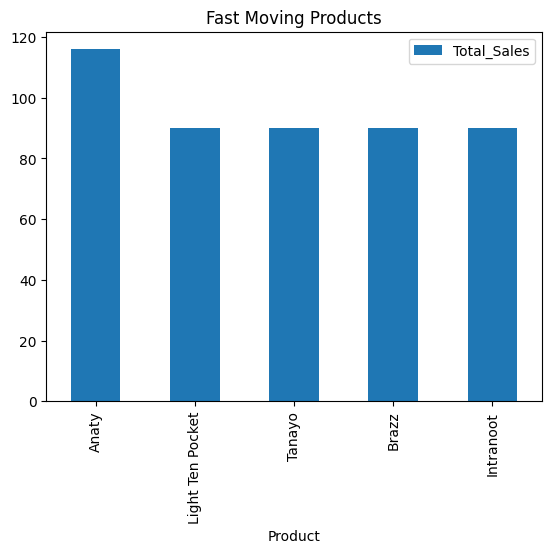

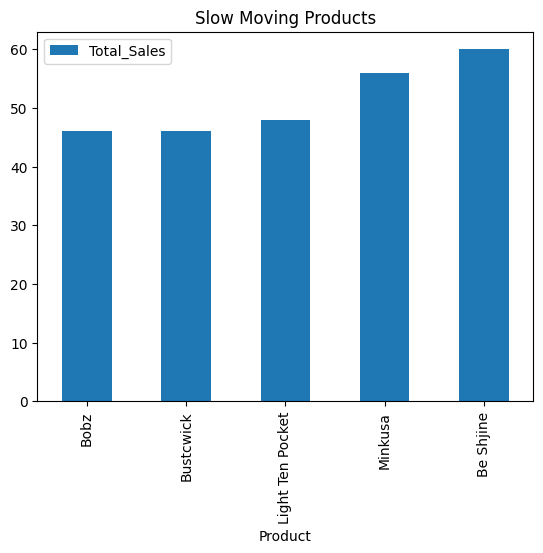

Non Moving Products: []


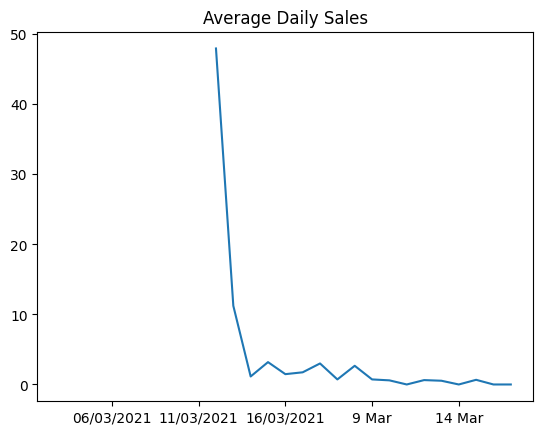

In [ ]:
import matplotlib.pyplot as plt

sales_columns = data.columns[6:]

data['Total_Sales'] = data[sales_columns].sum(axis=1)

fast_moving_products = data.nlargest(5, 'Total_Sales')
fast_moving_products.plot(x='Product', y='Total_Sales', kind='bar', title='Fast Moving Products')
plt.show()

slow_moving_products = data[data['Total_Sales'] > 0].nsmallest(5, 'Total_Sales')
slow_moving_products.plot(x='Product', y='Total_Sales', kind='bar', title='Slow Moving Products')
plt.show()

non_moving_products = data[data['Total_Sales'] == 0]
print("Non Moving Products:", non_moving_products['Product'].tolist())

average_daily_sales = data[sales_columns].mean()
average_daily_sales.plot(kind='line', title='Average Daily Sales')
plt.show()

Soal KE 2


In [ ]:
import pandas as pd

url = "/content/KAB - CPR Analyses - Emp.xlsx"
data = pd.read_excel(url)
data.head()

""


In [ ]:
print(data.columns)
all_sheets = pd.read_excel(url, sheet_name=None)
print(all_sheets.keys())

Index([], dtype='object')
dict_keys(['Sheet6', 'Performa Produk - 1 minggu', 'stok', 'iklan kk - 1 minggu', 'iklan KK - 1 bulan', 'iklan - kemarin', 'Master'])


In [ ]:
data = pd.read_excel(url, sheet_name='Performa Produk - 1 minggu')
data.replace('-', float('nan'), inplace=True)

In [ ]:
data['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'] = data['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'].astype(float)

In [ ]:
#KONVERSI DI BAWAH RATA-RATA
increasable_products = data[data['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'] < data['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'].mean()]

Increasable Products

In [ ]:
print(increasable_products[['Produk', 'Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)']])

                                      Produk  \
433      Fairgoods Crewneck - Barong - Putih   
528                   Short Sweatpants Green   
558   Fairgoods Crewneck - Way Kambas - Krem   
740    Fairgoods Crewneck - Wandering - Krem   
792       Fairgoods Crewneck - Barong - Krem   
...                                      ...   
4348                   Vertical Stripe - Red   
4353                   Stripe Black Tees 025   
4358                       Stripe Red Hoodie   
4363            Fairgoods Kaos- Tern - Hitam   
4368                            Brown Hoodie   

      Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)  
433                                              0.0015    
528                                              0.0052    
558                                              0.0077    
740                                              0.0062    
792                                              0.0070    
...                                                 ...    
434

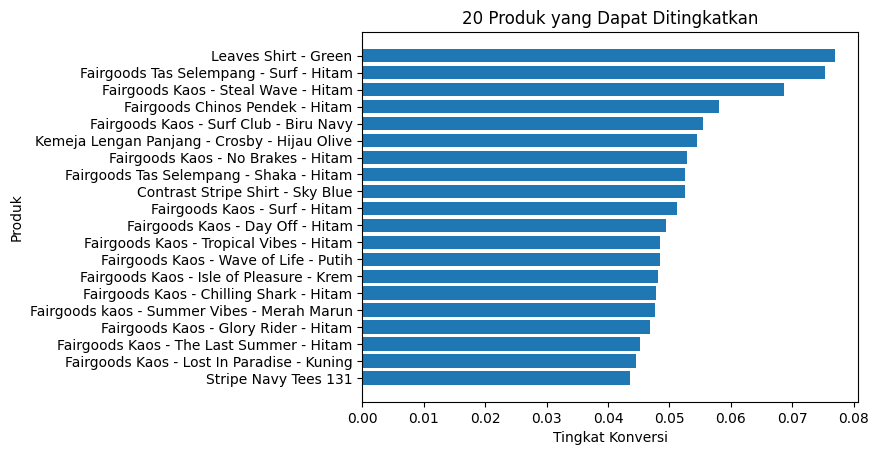

In [ ]:
increasable_products = data.nlargest(20, 'Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)', 'all')

plt.barh(increasable_products['Produk'], increasable_products['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'])
plt.xlabel('Tingkat Konversi')
plt.ylabel('Produk')
plt.title('20 Produk yang Dapat Ditingkatkan')
plt.gca().invert_yaxis()
plt.show()


Decreasable Products

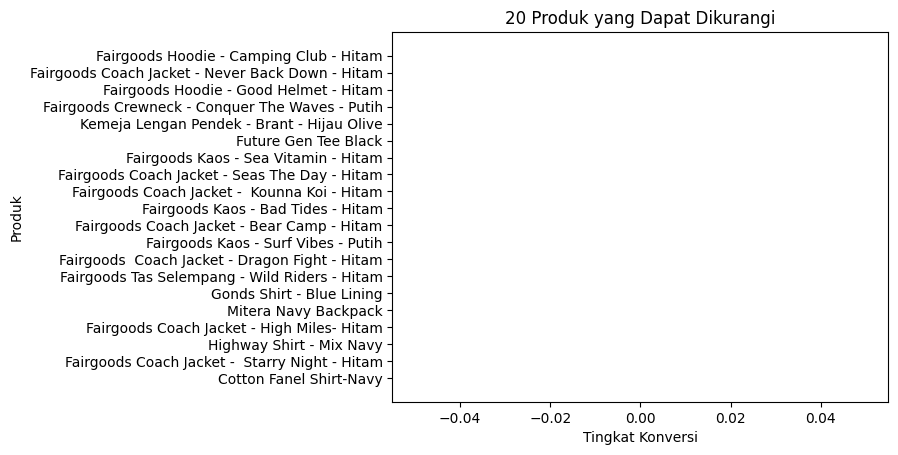

In [ ]:
# Ubah kolom menjadi tipe numerik
data['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'] = pd.to_numeric(data['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'], errors='coerce')

# Hapus baris dengan nilai NaN
data.dropna(subset=['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'], inplace=True)

# Urutkan data berdasarkan tingkat konversi dan ambil 20 produk terendah
decreasable_products = data.nsmallest(20, 'Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)')

# Plot horizontal bar chart
plt.barh(decreasable_products['Produk'], decreasable_products['Tingkat Konversi (Pesanan Dibayar dibagi Kunjungan)'])
plt.xlabel('Tingkat Konversi')
plt.ylabel('Produk')
plt.title('20 Produk yang Dapat Dikurangi')
plt.gca().invert_yaxis()
plt.show()


Potential Products

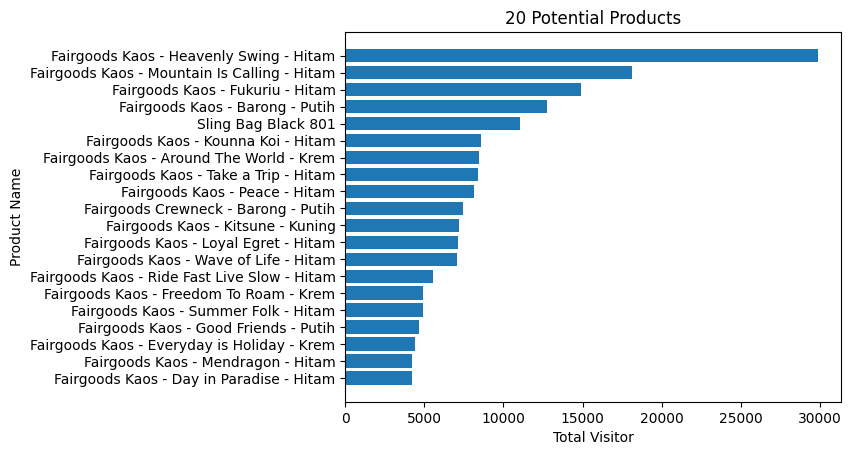

In [ ]:
potential_products = data.nlargest(20, 'Total Pengunjung (Kunjungan)')

plt.barh(potential_products['Produk'], potential_products['Total Pengunjung (Kunjungan)'])
plt.xlabel('Total Visitor')
plt.ylabel('Product Name')
plt.title('20 Potential Products')
plt.gca().invert_yaxis()
plt.show()

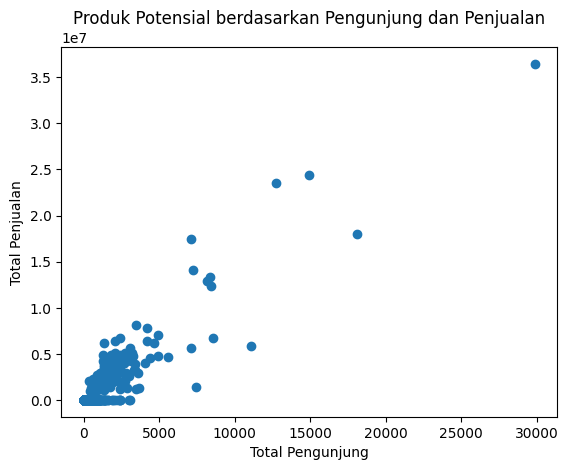

In [ ]:
data['Total Pengunjung (Kunjungan)'] = pd.to_numeric(data['Total Pengunjung (Kunjungan)'], errors='coerce')
data['Total Penjualan (Pesanan Dibayar) (IDR)'] = data['Total Penjualan (Pesanan Dibayar) (IDR)'].replace('[\.,]', '', regex=True).astype(float)


plt.scatter(data['Total Pengunjung (Kunjungan)'], data['Total Penjualan (Pesanan Dibayar) (IDR)'])
plt.title('Produk Potensial berdasarkan Pengunjung dan Penjualan')
plt.xlabel('Total Pengunjung')
plt.ylabel('Total Penjualan')
plt.show()

SOAL KE 3

In [ ]:
import pandas as pd

data = pd.read_excel('/content/KPI -Exmp.xlsx')
data.head()

,Rata0rata CPR per tanggal contoh tanggal 1 CPR nya berapa tanggal 2 CPR berapa tanggal 26 CPR berapa,Campaign,Trouble,Revenue,Order via website,Order via chat,Order via marketplace,Jumlah order,Barang Keluar,Retur,...,Adspend,Reach,Impression,Click,CPM,CTR,CPC,ROAS,CPR,Unnamed: 21
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,401702.0,180960.0,188098.0,4501.0,2135.599528,0.023929,89.247278,NaN,0.0,0
2,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,401645.0,191744.0,199273.0,5073.0,2015.551530,0.025458,79.173073,NaN,0.0,17910940
3,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,438175.0,177503.0,182187.0,4677.0,2405.083788,0.025671,93.687193,NaN,0.0,#DIV/0!
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,480472.0,177632.0,183053.0,4630.0,2624.769875,0.025293,103.773650,NaN,0.0,0


In [ ]:
print(data.columns)


Index(['Rata0rata CPR per tanggal contoh tanggal 1 CPR nya berapa tanggal 2 CPR berapa tanggal 26 CPR berapa',
       'Campaign', 'Trouble', 'Revenue', 'Order via website', 'Order via chat',
       'Order via marketplace', 'Jumlah order', 'Barang Keluar', 'Retur',
       'f. Instagram', 'f. Line', 'Adspend', 'Reach', 'Impression', 'Click',
       'CPM', 'CTR', 'CPC', 'ROAS', 'CPR', 'Unnamed: 21'],
      dtype='object')


In [ ]:
print(data['Rata0rata CPR per tanggal contoh tanggal 1 CPR nya berapa tanggal 2 CPR berapa tanggal 26 CPR berapa'].head())

0          NaT
1   2020-01-01
2   2020-01-02
3   2020-01-03
4   2020-01-04
Name: Rata0rata CPR per tanggal contoh tanggal 1 CPR nya berapa tanggal 2 CPR berapa tanggal 26 CPR berapa, dtype: datetime64[ns]


In [ ]:
data.rename(columns={"Rata0rata CPR per tanggal contoh tanggal 1 CPR nya berapa tanggal 2 CPR berapa tanggal 26 CPR berapa": "Tanggal"}, inplace=True)
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
data_filtered = data[(data['Tanggal'] >= '2020-01-01') & (data['Tanggal'] <= '2020-08-16')].copy()

In [ ]:
data_filtered = data[(data['Tanggal'] >= '2020-01-01') & (data['Tanggal'] <= '2020-12-31')].copy()

data_filtered['CPR'] = pd.to_numeric(data_filtered['CPR'], errors='coerce') * 100
data_filtered['ROAS'] = pd.to_numeric(data_filtered['ROAS'], errors='coerce') * 100
data_filtered['Revenue'] = pd.to_numeric(data_filtered['Revenue'], errors='coerce')
data_filtered['Adspend'] = pd.to_numeric(data_filtered['Adspend'], errors='coerce')

total_adspend = data_filtered['Adspend'].sum()

print(data_filtered.head())


     Tanggal  Campaign  Trouble  Revenue  Order via website  Order via chat  \
1 2020-01-01       NaN      NaN      NaN                NaN             NaN   
2 2020-01-02       NaN      NaN      NaN                NaN             NaN   
3 2020-01-03       NaN      NaN      NaN                NaN             NaN   
4 2020-01-04       NaN      NaN      NaN                NaN             NaN   
5 2020-01-05       NaN      NaN      NaN                NaN             NaN   

   Order via marketplace  Jumlah order  Barang Keluar  Retur  ...     Reach  \
1                    NaN           NaN            NaN    NaN  ...  180960.0   
2                    NaN           NaN            NaN    NaN  ...  191744.0   
3                    NaN           NaN            NaN    NaN  ...  177503.0   
4                    NaN           NaN            NaN    NaN  ...  177632.0   
5                    NaN           NaN            NaN    NaN  ...  239423.0   

   Impression   Click          CPM       CTR      

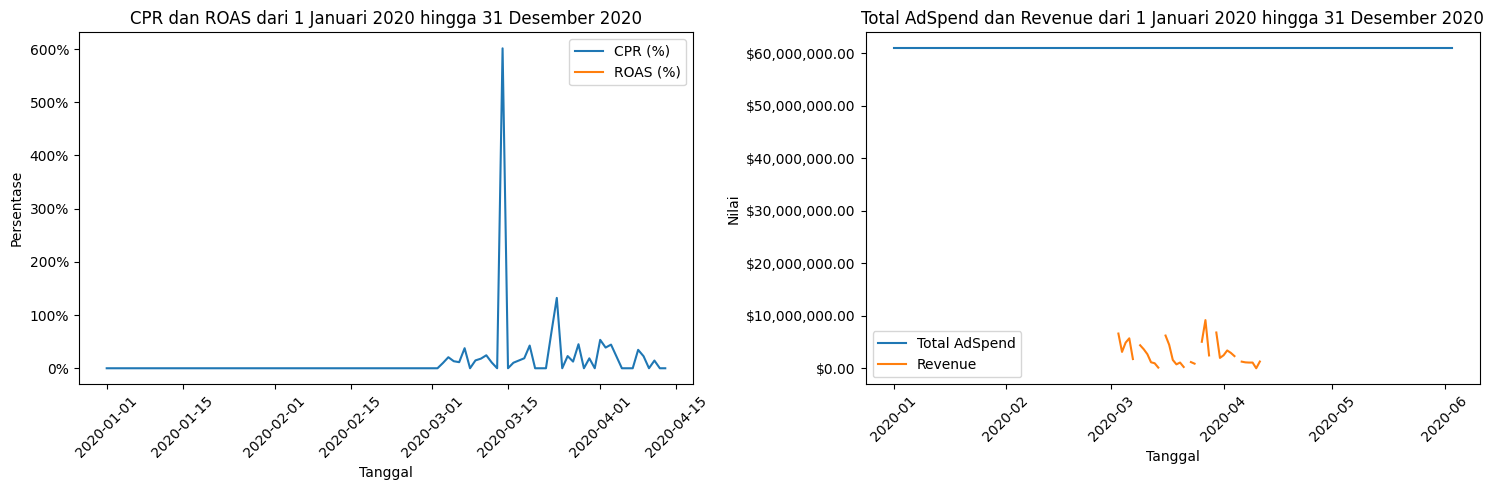

In [ ]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
plt.plot(data_filtered['Tanggal'], data_filtered['CPR'], label='CPR (%)')
plt.plot(data_filtered['Tanggal'], data_filtered['ROAS'], label='ROAS (%)')
plt.xlabel('Tanggal')
plt.ylabel('Persentase')
plt.title('CPR dan ROAS dari 1 Januari 2020 hingga 31 Desember 2020')
plt.legend()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

plt.subplot(1, 2, 2)
plt.plot(data_filtered['Tanggal'], [total_adspend for _ in data_filtered['Tanggal']], label='Total AdSpend')
plt.plot(data_filtered['Tanggal'], data_filtered['Revenue'], label='Revenue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Total AdSpend dan Revenue dari 1 Januari 2020 hingga 31 Desember 2020')
plt.legend()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))

plt.tight_layout()
plt.show()
